# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Key features of the data set include:

- Fixed acidity:  Acidity is an important factor in wine quality, as it can affect the taste, balance, and preservation of the wine.
- Volatile acidity: This measures the amount of volatile acids in the wine, which can contribute to a sour or vinegary taste if present in high amounts.
- Citric acid: This is a type of fixed acid that can contribute to the flavor and freshness of the wine. It can also help to balance out other flavors and aromas in the wine.
- Residual sugar: This refers to the amount of sugar that remains in the wine after fermentation has occurred. A higher residual sugar level can contribute to a sweeter taste, while a lower level can result in a drier wine.
- Chlorides: These are salt compounds that can contribute to the taste and mouthfeel of the wine. In small amounts, they can enhance the flavor of the wine, but too much can result in a salty or briny taste.
- Free sulfur dioxide: This is a type of preservative that is added to wine to prevent oxidation and spoilage. It can also contribute to the wine's aroma and flavor.
- Total sulfur dioxide: This measures the total amount of sulfur dioxide in the wine, including both free and bound forms. Too much sulfur dioxide can result in a harsh or sulfurous taste.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Load the wine dataset

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop(labels=['quality'], axis=1)
Y= df[['quality']]

In [4]:
mi_scores = mutual_info_classif(X,Y.values.flatten(), random_state=21)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [6]:
print(mi_scores)

alcohol                 0.191274
volatile acidity        0.126370
sulphates               0.090630
total sulfur dioxide    0.083509
density                 0.070929
chlorides               0.058789
citric acid             0.055742
fixed acidity           0.041325
pH                      0.035761
free sulfur dioxide     0.031431
residual sugar          0.017231
Name: MI Scores, dtype: float64


# Question 2 : How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [7]:
# Check Missing Values in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There is no null values in the dataset

## techniques for handling missing data:

- Mean/median imputation: In this technique, missing values are replaced with the mean or median value of the corresponding feature. This technique is simple and easy to implement, and can work well if the missing values are not too numerous. However, it can also introduce bias if the missing values are not missing at random, and it can reduce the variance of the data.

- Mode imputation: In this technique, missing values are replaced with the mode value of the corresponding feature. This technique works well for categorical variables and can be useful if the most common value is a good approximation of the missing value. However, it can also introduce bias if the missing values are not missing at random.

- K-nearest neighbor imputation: In this technique, missing values are replaced with the values of the nearest k-neighbors in the dataset. This method can work well if the missing data is not too extensive and the dataset has a clear underlying structure. However, it can also introduce bias if the nearest neighbors are not truly similar.

- Iterative imputation: In this technique, missing values are imputed by modeling the missing values as a function of other variables in the dataset. Multiple iterations are performed to refine the imputed values, with each iteration using the imputed values from the previous iteration as input. This technique can be effective if the missing data is not too extensive and can be modeled using other variables in the dataset. It can also provide a measure of uncertainty for the imputed values. However, it can be computationally expensive and requires a good understanding of the underlying data structure.



# Question 3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?


In [9]:
df_stud = pd.read_csv('stud.csv')
df_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The key fetures that affect students performance are as below:
  - gender
  - Race/ethnicity
  - Parental level of education
  - Lunch
  - Test preparation course
    

In [10]:
df_stud.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no duplicate values in the dataset

In [15]:
# check data types
df_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
## Check the statistics of the dataset
df_stud.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From the above description mean is very close between 66 and 69
- All the standard deviation between 14.5 to 15.19
- while there is min of 0 in maths and max of 100 in maths

In [16]:
df_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### In the dataset there are 2 type of features categorical and integer

In [18]:
## segregating numerical and categorical features
[feature for feature in df_stud.columns if df_stud[feature].dtype == 'O']

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [20]:
numerical_features = [feature for feature in df_stud.columns if df_stud[feature].dtype != 'O']
categorical_features = [feature for feature in df_stud.columns if df_stud[feature].dtype == 'O']

In [21]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [22]:
# Aggregate the total score with mean
df_stud['total_score'] = (df_stud['math_score']+df_stud['reading_score']+ df_stud['writing_score'])
df_stud['average'] = df_stud['total_score']/3
df_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## we can visualise average marks and gender


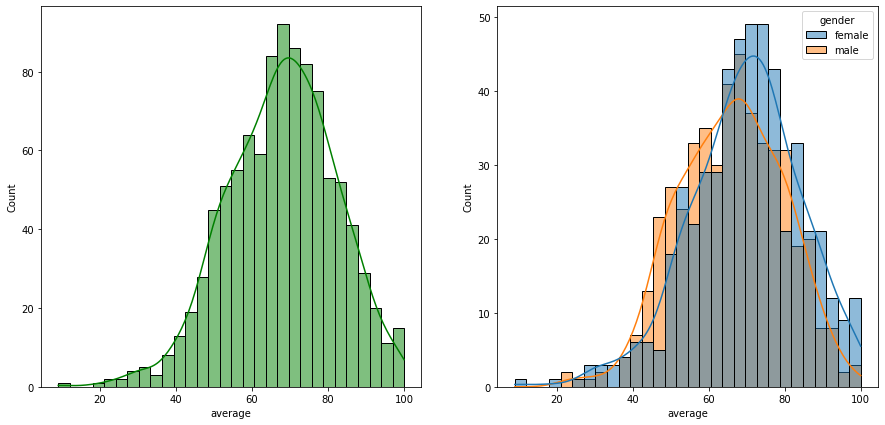

In [26]:
import seaborn as sns
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df_stud,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_stud,x='average',bins=30,kde=True,hue='gender')
plt.show()

#### Female students perform well than male students

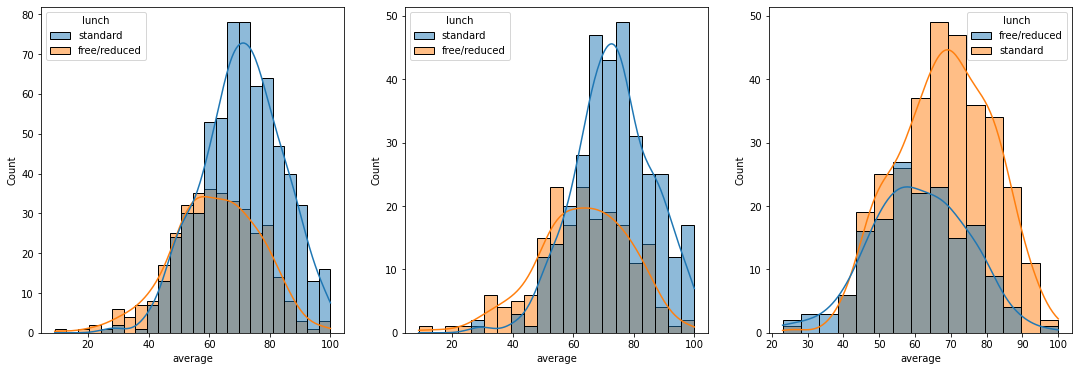

In [28]:
##  Will check lunch will affect students performance

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df_stud,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df_stud[df_stud.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df_stud[df_stud.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Standard lunch helps perform well in exams be it a male of female

# Question 4 : Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model.

Feature engineering is the process of selecting and transforming variables in order to improve the performance of a machine learning model. In the context of the student performance dataset, feature engineering would involve selecting and transforming the variables in order to predict students' performance on exams.

### Steps that could be taken for feature engineering in the context of the student performance dataset:

#### Data cleaning: 
Before feature engineering can begin, the data should be cleaned to remove any missing values, inconsistencies, or outliers. This could involve imputing missing values, correcting errors, and removing outliers.

#### Feature selection: 
The next step is to select the variables that are most relevant for predicting exam performance. This could involve examining the correlation between each variable and the target variable (total score), as well as considering domain knowledge and previous research. For example, variables such as math score, reading score, writing score, and test preparation course may be highly relevant for predicting exam performance.

#### Feature transformation: 
Once the relevant variables have been selected, they may need to be transformed in order to improve their predictive power. This could involve creating new variables from existing ones, such as calculating the average of the math, reading, and writing scores, or creating a binary variable to indicate whether or not a student completed a test preparation course. Other transformations could include scaling or standardizing the variables to ensure that they are on the same scale.

#### Feature engineering iterations: 
The feature engineering process is often an iterative one, where the data scientist goes back and forth between selecting and transforming variables until the model performance is optimized. This may involve trying different transformations, selecting different variables, or even collecting additional data.



# Question 5 : Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [31]:
df_wine = pd.read_csv('winequality-red.csv')

In [48]:
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def hist_plot(df_wine, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(12)
    sns.histplot(data=df_wine, x='price',kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    #plt.subplot(1,2,2)
    #stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Feature : fixed acidity


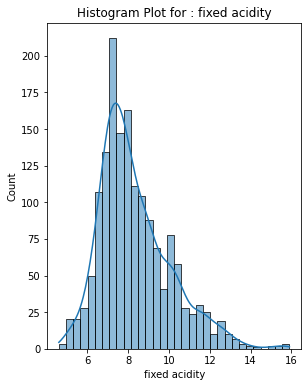

Feature : volatile acidity


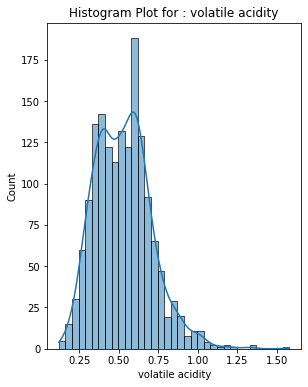

Feature : citric acid


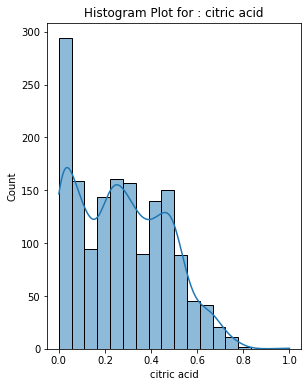

Feature : residual sugar


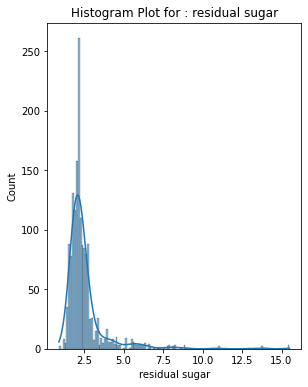

Feature : chlorides


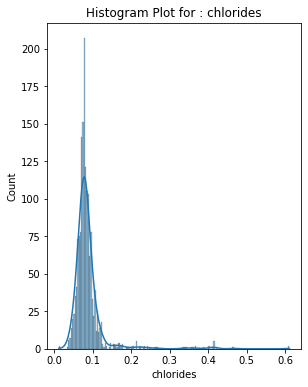

Feature : free sulfur dioxide


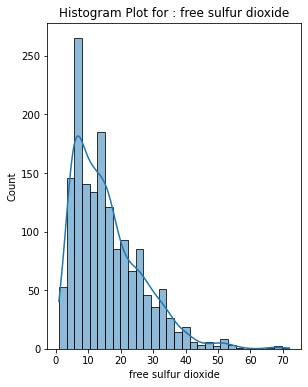

Feature : total sulfur dioxide


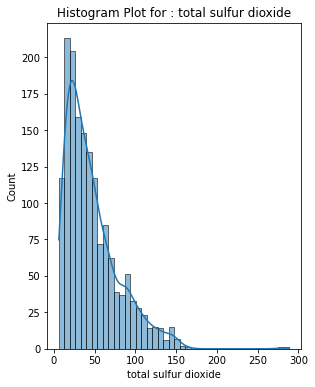

Feature : density


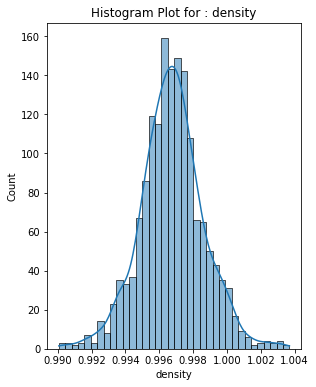

Feature : pH


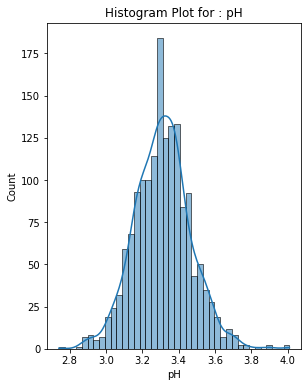

Feature : sulphates


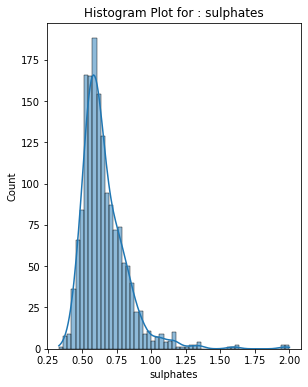

Feature : alcohol


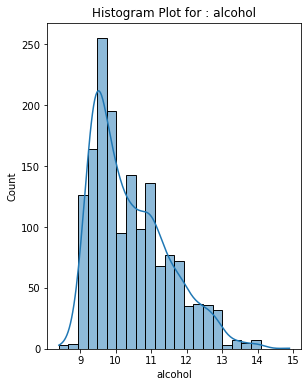

Feature : quality


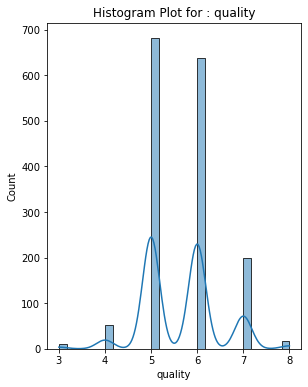

In [36]:
## Iterate QQ plot on each of variable 
for col in df_wine.columns:
    print(f'Feature : {col}')
    hist_plot(df,col)
   # print('\n'+'='*100 + '\n')


In [37]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

## Observations : All Features look Right (Positively) Skewed Except density, pH and quality are Normally distributed

# Question 6 : Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [38]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### All values are numerical in nature hence no need to perform categorical variable feature engineering


### Seperate independent and dependent variables

In [39]:
X = df_wine.drop(labels=['quality'], axis=1)
Y = df_wine[['quality']]

### Split data as Train and Test

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=56)

In [42]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1190,9.1,0.40,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5
888,6.8,0.57,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2
801,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8
591,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5


In [43]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1340,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3
1068,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
886,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9


### perform standard scaling (Z-score)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [45]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.452051,-0.708266,1.531420,1.380613,-0.165298,-0.944427,-0.797894,-0.122590,-0.178691,-0.505892,1.964141
1,-0.895945,0.243574,-1.403751,-0.042357,-0.331179,1.548705,0.527948,-0.990696,0.811254,-0.564199,0.731648
2,0.159008,0.131593,-0.940303,0.499727,-0.414120,-0.752648,-0.888292,0.324943,-0.508672,-1.263886,-0.406037
3,0.100400,-1.156190,0.759006,-0.177878,-0.268974,-0.369089,-0.828026,-1.298038,-1.102639,0.310410,1.300491
4,-1.013163,-0.764256,1.119466,-0.584441,-0.372649,0.685697,3.089232,-2.451917,-1.234632,-0.914042,1.016069


In [46]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.485686,-0.092369,-1.300763,-0.584441,-0.082357,-0.273199,-0.466433,-0.737274,0.349280,-0.680813,0.067998
1,0.334834,-1.324162,0.398547,-0.448920,-0.434855,0.877477,0.317018,0.136224,-0.838654,4.100380,-0.121616
2,1.624222,-1.212181,1.325443,-0.245638,-0.580001,-1.232096,-1.099221,-0.553947,-1.894595,1.010096,0.447227
3,0.393443,1.531358,-0.785820,-0.110117,-0.103092,-0.752648,-0.556832,0.869531,0.151291,-0.039434,-0.026809
4,-0.895945,2.147254,-1.094786,-0.381159,-0.580001,-1.136207,-1.069089,-0.446108,1.471218,-0.097741,0.447227


### Perform pricipal component analysis (PCA)

In [47]:
from sklearn.decomposition import PCA
pca= PCA(0.90)
pca.fit(x_train)
output_cols = pca.get_feature_names_out()
print(f'Output Columns : {output_cols}')
print(f'Explained Variance :{pca.explained_variance_ratio_}')


AttributeError: 'PCA' object has no attribute 'get_feature_names_out'